## (1)	使用jieba进行分词

In [4]:
import jieba
seg_list = jieba.cut("他在武汉大学学习", cut_all=False)
print("/".join(seg_list))

他/在/武汉大学/学习


## (2)	使用gensim中的Word2Vec模型训练词向量

In [5]:
import jieba
from gensim.models import word2vec
if __name__ == "__main__":
    
    with open(r".\expl_corpus.txt", encoding='utf-8') as f1:
        document = f1.read()
        document_cut = jieba.cut(document)
        result = ' '.join(document_cut)
        with open(r".\expl_corpus_segment.txt", 'w', encoding='utf-8') as f2:
            f2.write(result)
        
    corpus = r".\expl_corpus_segment.txt"
    sentences = word2vec.LineSentence(corpus)

In [14]:
if __name__ == "__main__":
    model = word2vec.Word2Vec(sentences, size=100, window=20, min_count=1, workers=4)
    model.save(r".\word2vec.model")
    model.wv.save_word2vec_format(r".\w2v.txt")

## (3)	使用训练好的词向量对指定的词进行相关性比较

In [15]:
if __name__ == "__main__":
    r = model.wv.similarity('中国', '中华')
    print(r)

0.43596


## (4)	使用训练好的词向量选出与指定词类比最相似的5个词

In [17]:
from gensim.models import word2vec
import gensim
path = r'.\word2vec.model'
wv_model = gensim.models.Word2Vec.load(path)
r = wv_model.wv.most_similar(positive=['武汉'], topn=5)
print(r)

[('沈阳', 0.9109004735946655), ('郑州', 0.9063078165054321), ('成都', 0.8954720497131348), ('哈尔滨', 0.8820277452468872), ('太原', 0.8812846541404724)]


## (5)	使用训练好的词向量选出与指定词类比最相似和最不相似的5个词

In [18]:
from gensim.models import word2vec
import gensim
path = r'.\word2vec.model'
wv_model = gensim.models.Word2Vec.load(path)
r = wv_model.wv.most_similar(positive=['湖北', '成都'], negative=['武汉'], topn=5)
print(r)

[('河南', 0.8787837028503418), ('河北', 0.8739839196205139), ('安徽', 0.8555622100830078), ('黑龙江', 0.8510888814926147), ('浙江', 0.8479000329971313)]


## (6)	使用sklearn中的PCA方法对指定列表中的所有词的词向量进行降维并使用seaborn和matplotlib将其可视化

C:\Users\22848\AppData\Local\Temp/ipykernel_54284/780457303.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embeddings.append(wv_model[i])


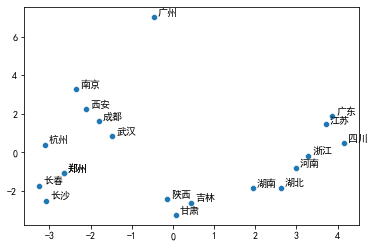

In [4]:
from gensim.models import word2vec
import gensim
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

data = ['江苏', '南京', '成都', '四川', '湖北', '武汉', '河南', '郑州', '甘肃', '郑州', '湖南', '长沙', '陕西', '西安', '吉林', '长春',\
        '广东', '广州', '浙江', '杭州']

# 导入模型
path = r'.\word2vec.model'
wv_model = gensim.models.Word2Vec.load(path)

# 构造符合pca.fit_transform输入的二维数组
embeddings = []
for i in data:
    embeddings.append(wv_model[i])

# 构建PCA模型
pca = PCA(n_components=2)
results = pca.fit_transform(embeddings)

# 配置绘图选项以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘图
sns.scatterplot(x=results[:, 0], y=results[:, 1])
for index, xy in enumerate(zip(results[:, 0], results[:, 1])):
    plt.annotate(data[index], xy=xy, xytext=(xy[0]+0.1, xy[1]+0.1))